In [107]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import regex as re
import seaborn as sns
import scipy.stats as stats
import statistics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h1>
    Import raw data files
</h1>

In [77]:
literacy = pd.read_excel("./mp_literacy_total_scores_v2.xlsx", index_col='_id')
numeracy = pd.read_excel("./mp_numeracy_total_scores_v2.xlsx", index_col='_id')

In [78]:
literacy.loc[:, 'Type'] = literacy.loc[:, 'school_details.District_label'].apply(lambda x: 'Treatment' if ((x == 'Sehore') | (x == 'Shajapur')) else 'Control')

<h1>
    Visualization
</h1>

In [80]:
# literacy.groupby(['school_details.District_label', 'student_gender'])['school_details.UDISE_cd_label'].count().to_excel("mp_summary.xlsx")

In [81]:
literacy.groupby(['school_details.District_label', 'student_gender'])['school_details.UDISE_cd_label'].count()

school_details.District_label  student_gender
Guna                           Female            138
                               Male              141
Sehore                         Female            174
                               Male              174
Shajapur                       Female            226
                               Male              173
Vidisha                        Female            144
                               Male              139
Name: school_details.UDISE_cd_label, dtype: int64

In [85]:
df_grouped = literacy.groupby(['school_details.District_label', 'school_details.UDISE_cd_label'], as_index=False).aggregate(total_students=('SI_std_name', 'count'))

In [106]:
df_grouped[df_grouped['total_students'] <5].groupby('school_details.District_label').count()

,school_details.UDISE_cd_label,total_students
school_details.District_label,,
Guna,27,27
Sehore,37,37
Shajapur,22,22
Vidisha,30,30


In [69]:
literacy.groupby(['school_details.District_label'])['school_details.UDISE_cd_label'].nunique()

school_details.District_label
Guna        58
Sehore      72
Shajapur    70
Vidisha     61
Name: school_details.UDISE_cd_label, dtype: int64

In [28]:
literacy.groupby(['assessment_date', 'school_details.UDISE_cd_label'], sort=True).count()

tabletUserName  \
assessment_date school_details.UDISE_cd_label                   
13-09-2022      23070436601                                 1   
14-09-2022      23330127304                                 1   
15-09-2022      23330506203                                 1   
                23330511703                                 3   
                23330519201                                 1   
16-09-2022      23330526302                                 5   
17-09-2022      23330111801                                 6   
20-09-2022      23220709501                                 1   
2022-09-09      23330203402                                 3   
                23330208101                                 7   
                23330208201                                 5   
                23330209601                                 5   
                23330211101                                 1   
                23330215402                                 5   
                23330406905                                 4   
                23330407402                                 7   
                23330408503                                 5   
                23330408803                                 3   
                23330409301                                 2   
                23330410401                                 4   
                23330418801                                 5   
                23330419101                                 1   
2022-09-10      23330302301                                 4   
                23330303701                                 4   
                23330307502                                 4   
                23330318001                                 2   
                23330409402                                 4   
                23330411301                                 9   
                23330412601                                 9   
                23330413701                                 3   
                23330415601                                 5   
2022-09-12      23330104801                                 2   
                23330108202                                 4   
                23330112201                                 5   
                23330117403                                 3   
                23330131001                                 6   
                23330519601                                 4   
2022-09-13      23070407202                                 3   
                23070407803                                 5   
                23070417003                                 5   
                23070419602                                 9   
                23070420004                                 4   
                23070432002                                 1   
                23070436601                                 5   
                23330102301                                 6   
                23330105402                                 4   
                23330110102                                 5   
                23330111101                                 4   
                23330121701                                 4   
                23330505402                                 4   
2022-09-14      23070409002                                 6   
                23070914601                                 4   
                23070916001                                 4   
                23070938902                                 4   
                23330102204                                 3   
                23330115001                                12   
                23330122501                                 2   
                23330122802                                 2   
                23330126101                                 4   
                23330127304                                 4   
                2

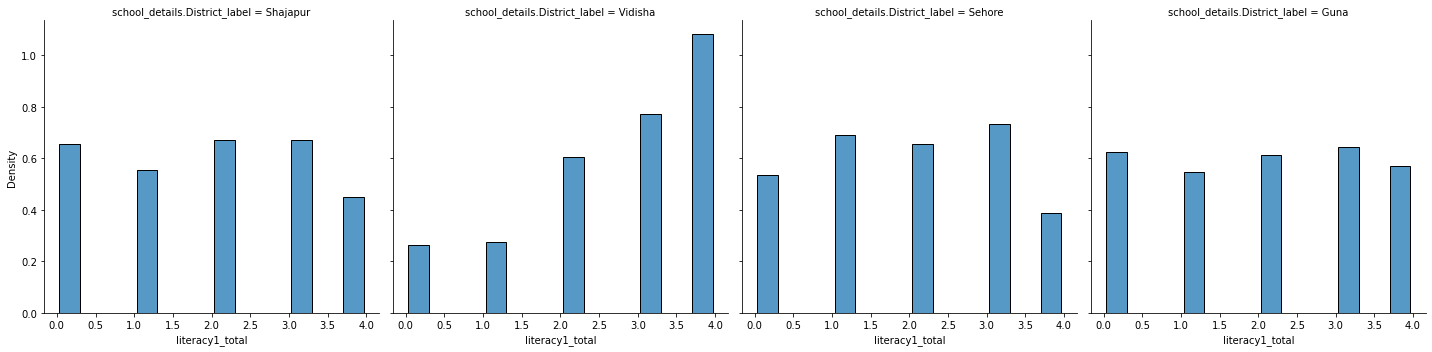

In [10]:
sns.displot(literacy, x='literacy1_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

In [149]:
# sns.displot(mp_total_scores, x='literacy2_total', col='school_details.District_label', bins=10, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('oral_vocabulary.jpg')

In [150]:
# sns.displot(mp_total_scores, x='literacy3_total', col='school_details.District_label', bins=10, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('initial_sounds.jpg')

In [151]:
# sns.displot(mp_total_scores, x='literacy4_ut_total', col='school_details.District_label', bins=15, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('letter_naming_untimed.jpg')

In [152]:
# sns.displot(mp_total_scores, x='literacy4_tt_total', bins= 20, col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('letter_naming_timed.jpg')

In [153]:
# sns.displot(mp_total_scores, x='literacy5_ut_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('familiar_words_untimed.jpg')

In [154]:
# sns.displot(mp_total_scores, x='literacy5_tt_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('familiar_words_timed.jpg')

In [155]:
# sns.displot(mp_total_scores, x='literacy6_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('non_words.jpg')

In [156]:
# sns.displot(mp_total_scores, x='literacy7_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('orf.jpg')

In [157]:
# sns.displot(data=mp_total_scores, x='literacy8_reading_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('reading_comprehension.jpg')

In [158]:
# sns.displot(data=mp_total_scores, x='literacy8_comprehension_total', col='school_details.District_label',  bins=5, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('reading_comprehension_questions.jpg')

In [159]:
# sns.displot(data=mp_total_scores, x='literacy9a_total', col='school_details.District_label',  bins=5, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('letter_writing.jpg')

In [160]:
# sns.displot(data=mp_total_scores, x='literacy9b_total', col='school_details.District_label',  bins=5, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('word_writing.jpg')

<h1 style="color:blue;">
    Literary Sub-task Score Calculations
</h1>

<h3>
    Literacy 1: Listening Comprehension
</h3>

In [63]:
# Checking baseline equivalence
treatment_sample = len(literacy[literacy['Type'] == 'Treatment'])
control_sample = len(literacy[literacy['Type'] == 'Control'])
treatment_sd = np.std(literacy[literacy['Type'] == 'Treatment']['literacy1_total'])
control_sd = np.std(literacy[literacy['Type'] == 'Control']['literacy1_total'])
# pooled_sd = np.sqrt()




# math.sqrt(
#                       ((n1 - 1)*SD1 * SD1 +
#                      (n2-1)*SD2 * SD2) / 
#                                   (n1 + n2-2))

In [66]:
print(treatment_sample, control_sample)

747 562


<h3>
    Literacy 2: Oral Vocabulary
</h3>

<h3>
    Literacy 3: Initial Sound Identification
</h3>

<h3>
    Literacy 4: Letter Recognition (Untimed)
</h3>

<h3>
    Literacy 4: Letter Recognition (Timed)
</h3>

<h3>
    Literacy 5: Familiar Words Reading (Untimed)
</h3>

<h3>
    Literacy 5: Familiar Words Reading (Timed)
</h3>

<h3>
    Literacy 6: Non-word Reading
</h3>

<h3>
    Literacy 7: Oral Reading Fluency (Timed)
</h3>

<h3>
    Literacy 8: Reading Comprehension (Untimed)
</h3>

<h3>
    Literacy 9a: Dictation (Letters)
</h3>

<h3>
    Literacy 9a: Dictation (Words)
</h3>

<h2>
    B. Numeracy Sub-tasks Data Cleaning
</h2>

<h3>
    Numeracy 1: Counting
</h3>

<h3>
    Numeracy 2: Number Recognition (Untimed)
</h3>

<h3>
    Numeracy 2: Number Recognition (Timed)
</h3>

<h3>
    Numeracy 3: Number Comparison
</h3>

<h3>
    Numeracy 4: Counting in Bundles
</h3>

<h3>
    Numeracy 5: Missing Numbers
</h3>

<h3>
    Numeracy 6: Addition
</h3>

<h3>
    Numeracy 7: Subtraction
</h3>

<h3>
    Numeracy 8: Word Problems
</h3>

<h3>
    Numeracy 9a: Shape Recognition (Circle)
</h3>

<h3>
    Numeracy 9a: Shape Recognition (Rectangle)
</h3>